**1) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.**

Machine Learning is best employed when dealing with complex patterns and relationships within data, scenarios where human analysts or traditional algorithms might struggle to identify intricate patterns. For instance, predicting customer preferences based on historical data benefits from ML's ability to discern subtle patterns that significantly impact decision-making. Additionally, ML excels in handling large datasets, finding meaningful insights, and making predictions or classifications based on data patterns. Image recognition tasks utilizing neural networks exemplify this, where the vast amount of data contributes to the model's ability to generalize efficiently. Automating repetitive tasks is another area where ML is beneficial,  email filtering for spam detection is a an example. The algorithms adapt to new spam patterns based on user behavior.

In regards to ML being a bad choice, limited or poor-quality data can hinder ML performance, as the accuracy of ML models heavily relies on the quality of training data. In scenarios with simple and well-defined problems, where clear solutions exist, ML can be excessive, and simpler algorithms or rule-based systems could be more efficient. For example, basic arithmetic calculations where rules are clear would not find ML necessary.  Resource constraints, both computational and human expertise, can also influence the decision to use ML. ML models, particularly deep learning models, can be computationally expensive, making simpler approaches more practical in resource-limited settings. Finally, lack of expertise in developing and maintaining ML models can be a barrier, and simpler, traditional approaches might be more suitable in such cases, as seen in small businesses without access to data scientists attempting complex ML implementations.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('titanic_test_data.csv')

df.head(10)

/var/folders/mf/w0q0hwpx6_g6f6s9gpkk33z00000gn/T/ipykernel_7393/1024904748.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**2) Pre-processing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('titanic_test_data.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ','_') #cleaned titles, made them lowercase, removed spaces

# df = df.drop(['cabin', 'fare', 'sibsp', 'parch',], axis=1) #dropped unecessary columns that didn't contribute to the data analysis

#rounded the ages to their nearest, lowest value, nullify missing values, and turn the number into integers
df['age']= np.floor(df['age'].fillna(0)).astype(int) 

# extracted the titles in the name column in order to map them and create a new column
df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['title'].unique()

title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Ms': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Col': 'Colonel',
    'Rev':'Reverend',
    'Dr':'Doctor',
    'Dona': 'Lady'
    
}
df['title'] = df['title'].map(title_mapping)

df['name'] = df['name'].str.replace(' ([A-Za-z]+)\.', '', regex=True) #removed the titles from the original name column 

# df_encoded = pd.get_dummies(df, columns = ['sex'])
df['sex'] = df['sex'].map({'male': 0, 'female':1})

df


<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
/var/folders/mf/w0q0hwpx6_g6f6s9gpkk33z00000gn/T/ipykernel_7393/663644970.py:16: SyntaxWarning: invalid escape sequence '\.'
  df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/var/folders/mf/w0q0hwpx6_g6f6s9gpkk33z00000gn/T/ipykernel_7393/663644970.py:33: SyntaxWarning: invalid escape sequence '\.'
  df['name'] = df['name'].str.replace(' ([A-Za-z]+)\.', '', regex=True) #removed the titles from the original name column


,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,892,3,"Kelly, James",0,34,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Albert",0,27,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Woolf",0,0,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Fermina",1,39,0,0,PC 17758,108.9000,C105,C,Lady
415,1307,3,"Saether, Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Frederick",0,0,0,0,359309,8.0500,NaN,S,Mr


**3) Correlation Matrix**

<Axes: title={'center': 'Titanic Passenger Data Correlation Matrix'}>

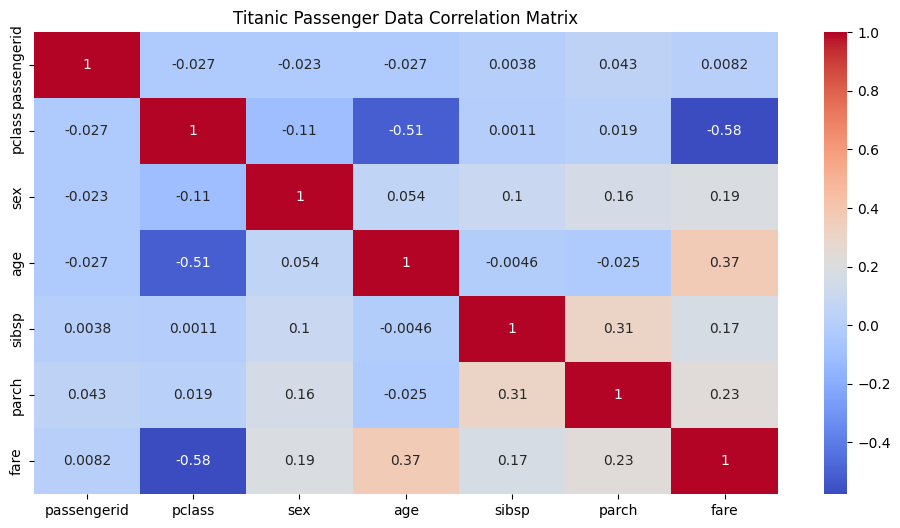

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()
plt.figure(figsize=(12,6))
plt.title('Titanic Passenger Data Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')



In the Titanic passenger data set, there are several noteworthy patterns. Firstly, there is a moderately positive correlation of 0.37 between age and fare, indicating that, on average, older passengers tend to pay slightly higher fares. 

Secondly, the correlation between the number of siblings/spouse on board and the number of parents/children on board is 0.31, suggesting a modest positive relationship between family sizes.

Thirdly, a distinct negative correlation of -0.58 exists between passenger class and fare, suggesting that higher-class passengers paid lower fares, emphasizing potential discounts or included amenities for premium accommodations. Additionally, age and passenger class exhibit a negative correlation of -0.5, indicating that, on average, older passengers tend to occupy lower passenger classes.
 
Lastly, the correlation values in the sex columns being close to 0 suggest a weak linear relationship between gender and other numerical features, indicating that gender might not strongly influence these specific aspects of the data. 

These insights shed light on age-related fare trends, family size dynamics, class-based fare differentials, and the interaction between age, class, and gender among Titanic passengers.

**4) Box and Whisker Plot**

Text(0.5, 1.0, 'Titanic Fare Box and Whisker Plot')

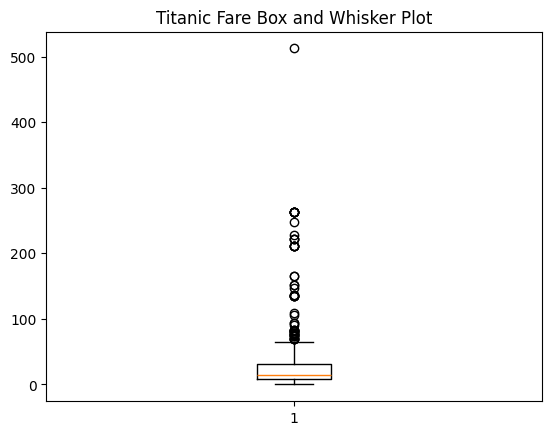

In [18]:
import matplotlib.pyplot as plt

plt.boxplot(df_cleaned['fare'].dropna()) 
plt.title('Titanic Fare Box and Whisker Plot')


Text(0.5, 1.0, 'Titanic Fare Box and Whisker Plot - No Outliers')

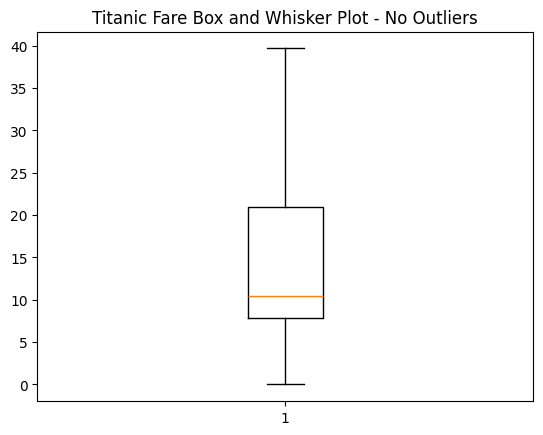

In [12]:
df_no_outliers = df[df['fare']<40]
plt.boxplot(df_no_outliers['fare'])
plt.title('Titanic Fare Box and Whisker Plot - No Outliers')

*Null Values:*

In the situation of creating a box and whisker plot for the fares of our Titanic passengers, only one null value was present. After doing research I came to two common solutions in handling null values, removing or imputing  the value(s). In this situation, I felt that imputing the missibg value with a mean or average would lead to an unnecessary skew in my data, which could create further complications in analysis. Removing the value seemed to be the best option, considering that the data already has many present outliers already. 


*Boxplot Analysis:*

The box plot's median line appears in the bottom suggesting tightly packed data in those fare prices. The IQR is not very spread out nor porportional to the rest of the graph implying the overall majority fare prices being paid are substansially lower compared to the remainder of the data points. There is a heavy skew to the lower end of the graph. There are many outliers in the graph, however how large the data set is, it does not come to surprise. There is one major outlier of a fare costing more than 500 dollars. This asks us to call into question why the fare price was specifically so high for that passenger.


**5) Age-Bin**


*Method 1: Lambda*

In [7]:

df['age_bin']= df['age'].apply(lambda age: '0-9' if age < 10 else ('10-19' if age < 20 else ('20-29' if age < 30 else ('30-39' if age < 40 else '40+'))))

# bins = [0, 9, 19, 29, 39, df['age'].max()]
# labels = ['0-9', '10-19', '20-29', '30-39', '40+']
# df['age_bin_cut'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

df

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_bin
0,892,3,"Kelly, James",0,34,0,0,330911,7.8292,NaN,Q,Mr,30-39
1,893,3,"Wilkes, James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,Mrs,40+
2,894,2,"Myles, Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,Mr,40+
3,895,3,"Wirz, Albert",0,27,0,0,315154,8.6625,NaN,S,Mr,20-29
4,896,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,Mrs,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Woolf",0,0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0-9
414,1306,1,"Oliva y Ocana, Fermina",1,39,0,0,PC 17758,108.9000,C105,C,Lady,30-39
415,1307,3,"Saether, Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,30-39
416,1308,3,"Ware, Frederick",0,0,0,0,359309,8.0500,NaN,S,Mr,0-9


*Method 2: PD Cut*

In [8]:
bins = [0, 9, 19, 29, 39, df['age'].max()]
labels = ['0-9', '10-19', '20-29', '30-39', '40+']
df['age_bin_cut'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

df

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_bin,age_bin_cut
0,892,3,"Kelly, James",0,34,0,0,330911,7.8292,NaN,Q,Mr,30-39,30-39
1,893,3,"Wilkes, James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,Mrs,40+,40+
2,894,2,"Myles, Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,Mr,40+,40+
3,895,3,"Wirz, Albert",0,27,0,0,315154,8.6625,NaN,S,Mr,20-29,20-29
4,896,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,Mrs,20-29,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Woolf",0,0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0-9,0-9
414,1306,1,"Oliva y Ocana, Fermina",1,39,0,0,PC 17758,108.9000,C105,C,Lady,30-39,30-39
415,1307,3,"Saether, Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,30-39,30-39
416,1308,3,"Ware, Frederick",0,0,0,0,359309,8.0500,NaN,S,Mr,0-9,0-9


In [9]:
import timeit

time_lambda = timeit.timeit(lambda: df['age'].apply(lambda age: '0-9' if age < 10 else ('10-19' if age < 20 else ('20-29' if age < 30 else ('30-39' if age < 40 else '40+')))), number=100)


time_cut = timeit.timeit(lambda: pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True), number=100)

print(f"Method 1 time: {time_lambda}")
print(f"Method 2 time: {time_cut}")


Method 1 time: 0.05267677499796264
Method 2 time: 0.08138497800246114


**6) Histograms**

IndexError: index 2 is out of bounds for axis 0 with size 2

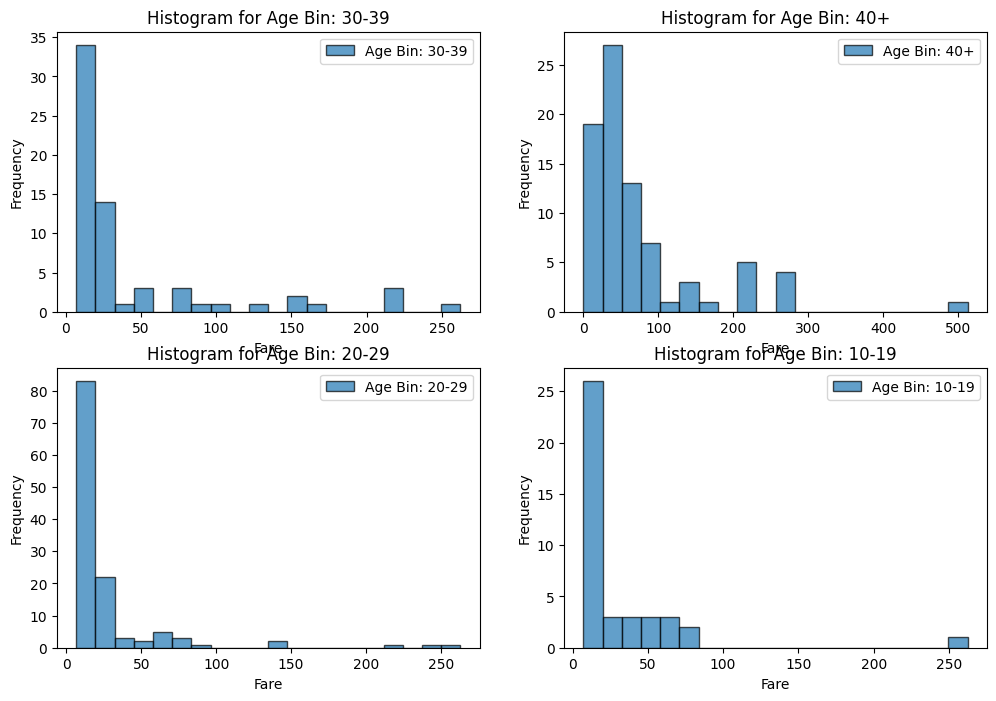

In [10]:
import matplotlib.pyplot as plt

age_bins = df['age_bin_cut'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, age_group in enumerate(age_bins):
    row, col = divmod(i, 2)
    axes[row, col].hist(df[df['age_bin_cut'] == age_group]['fare'], bins=20, edgecolor='black', label=f'Age Bin: {age_group}', alpha=0.7)
    axes[row, col].set_title(f'Histogram for Age Bin: {age_group}')
    axes[row, col].set_xlabel('Fare')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()



In analyzing the histograms of fare distributions across age bins, distinct patterns emerge. The age bin 10-19 reveals a limited range in fare prices, with the majority paying under $20, indicating a more homogeneous spending pattern within this group and fewer outliers. On the contrary, the 40+ age group exhibits the highest variance in fare prices, showcasing a broader spectrum and the absence of a clear majority in the lowest fare range. Overall, there is a noticeable trend of increasing fare variety with age; older age groups exhibit a more diverse range of fare expenditures, suggesting a wider range of socio-economic backgrounds. Despite these differences, all age bin histograms demonstrate a leftward skewness, emphasizing a general trend of lower fares being more prevalent across the dataset.